## Kaggle, backpack prediction challenge.


In This section of the project I perform exploratory data analysis (EDA) and preprocessing on a backpack dataset from a Kaggle competition. Here's a breakdown of the key insights obtained from this processes:

**Data Exploration:**

* **Missing Values:** The code identifies and addresses missing values in several columns ('Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)').  Different strategies are used:
    * Filling with 'Unknown' for categorical features.
    * Using the mode (with random tie-breaking) for binary features ('Laptop Compartment', 'Waterproof').
    * Imputing the mean for 'Weight Capacity (kg)'.
* **Data Types:** The code corrects data types for certain columns. 'Compartments' is converted to integer type. 'Laptop Compartment' and 'Waterproof' are converted to boolean.
* **Categorical Features:**  The analysis examines the distributions of categorical features like 'Brand', 'Material', 'Size', 'Style', and 'Color' using value counts and bar plots.  These visualizations help understand the prevalence of different categories.
* **Numerical Features:** 'Weight Capacity (kg)' and 'Price' are analyzed using box plots and descriptive statistics (mean, median, quartiles, etc.) to identify potential outliers and understand the distribution.
* **Column Renaming:** Column names are cleaned and simplified (lowercase, spaces replaced with underscores).

**Data Preprocessing:**

* **Missing Value Imputation:** As mentioned above, various methods are employed to fill in missing data. The choice of method depends on the nature of the variable.
* **Data Type Conversion:**  Columns are converted to appropriate data types.
* **Encoding Categorical Variables:** The code *includes* commented-out sections for One-Hot Encoding (for 'brand', 'material', 'style', and 'color') and Ordinal Encoding (for 'size').  These sections are currently not executed.  The final dataset retains the original categorical features.
* **Data Saving:** The preprocessed data is saved to another file for further analysis.

The notebook provides a good foundation for further analysis and model building.  In the next section of the project I will choose an appropiate encoding technique to handle categorical features and training a model.


In [ ]:
%pip install -q kaggle

In [ ]:
%pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/playground-series-s5e2/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sergiojoelcz
Your Kaggle Key: ··········


100%|██████████| 92.7M/92.7M [00:00<00:00, 148MB/s]



Extracting archive ./playground-series-s5e2/playground-series-s5e2.zip to ./playground-series-s5e2


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/playground-series-s5e2/train.csv')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [7]:
display(df.sample(5))

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
178417,178417,Jansport,Leather,Large,9.0,No,No,Backpack,Pink,29.872636,113.81064
212181,212181,Under Armour,Polyester,Medium,6.0,No,Yes,Backpack,Red,10.085410,41.74680
247615,247615,Jansport,Leather,Medium,10.0,No,Yes,Backpack,Blue,26.443623,33.44237
214891,214891,Under Armour,Polyester,Medium,1.0,NaN,Yes,Backpack,Blue,11.908605,68.78926
106694,106694,Puma,Canvas,Medium,7.0,No,Yes,Tote,Black,20.581763,70.15821


# Exploratory Data Analysis.

In [8]:
# check if there is fully duplicated rows
df.duplicated().sum()

0

In [9]:
# check for missing values
df.isna().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [10]:
# print column names
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

- Brand column

In [11]:
# check brand distribution while keeping NaNs
df['Brand'].value_counts(dropna=False)

,count
Brand,
Adidas,60077
Under Armour,59992
Nike,57336
Puma,56814
Jansport,56076
NaN,9705


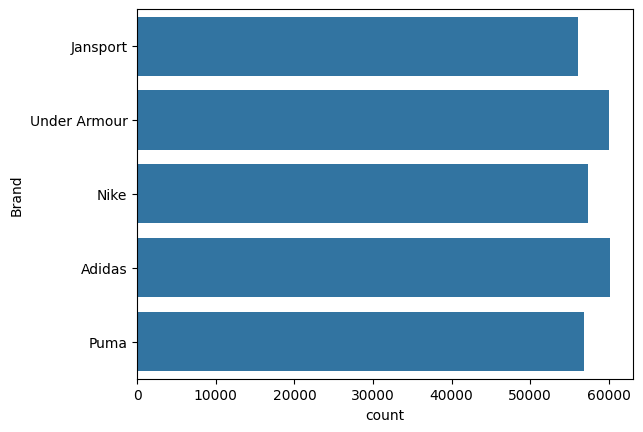

In [12]:
# Barplot Brand column
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Brand'])
plt.show()

- Material column

In [13]:
# check Material column distribution
df['Material'].value_counts(dropna=False)

,count
Material,
Polyester,79630
Leather,73416
Nylon,70603
Canvas,68004
NaN,8347


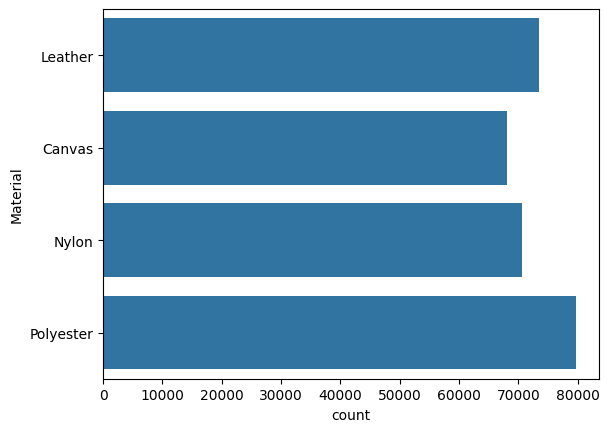

In [14]:
# barplot vertically Material column
sns.countplot(df['Material'])
plt.show()

In [15]:
# check Size distribution, keep NaNs
df['Size'].value_counts(dropna=False)

,count
Size,
Medium,101906
Large,98643
Small,92856
NaN,6595


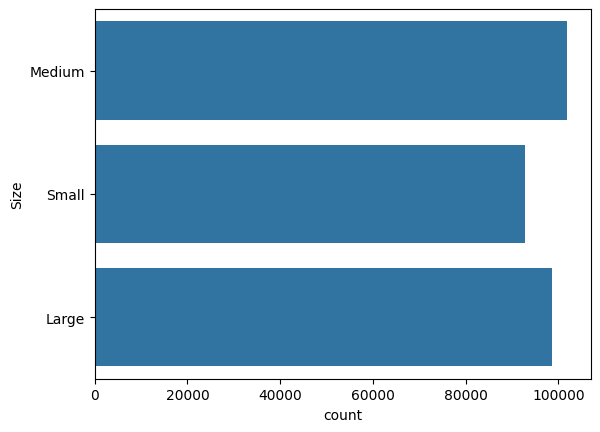

In [16]:
# barplot Size column
sns.countplot(df['Size'])
plt.show()

In [17]:
# ckeck Compartments dristribution
df['Compartments'].value_counts(dropna=False)

,count
Compartments,
1.0,31568
4.0,31498
2.0,30595
3.0,30293
7.0,30158
9.0,29965
5.0,29959
10.0,29815
8.0,28909


In [18]:
# check Laptop Compartment column
df['Laptop Compartment'].value_counts(dropna=False)

,count
Laptop Compartment,
Yes,148342
No,144214
NaN,7444


In [19]:
# check Waterproof column
df['Waterproof'].value_counts(dropna=False)

,count
Waterproof,
Yes,148077
No,144873
NaN,7050


In [20]:
# Check Style column distribution
df['Style'].value_counts(dropna=False)

,count
Style,
Messenger,100031
Tote,97438
Backpack,94561
NaN,7970


In [21]:
# check Color column distribution
df['Color'].value_counts(dropna=False)

,count
Color,
Pink,51690
Gray,50280
Blue,48097
Red,47219
Green,46386
Black,46378
NaN,9950


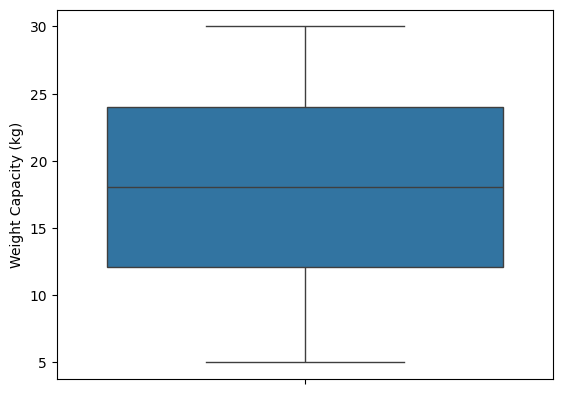

In [22]:
# boxplot Weight Capacity (kg) column
sns.boxplot(df['Weight Capacity (kg)'])
plt.show()

In [23]:
# Describe Weight Capacity (kg) column
df['Weight Capacity (kg)'].describe()

,Weight Capacity (kg)
count,299862.000000
mean,18.029994
std,6.966914
min,5.000000
25%,12.097867
50%,18.068614
75%,24.002375
max,30.000000


In [24]:
# how many missing values in Weight Capacity (kg) column?
df['Weight Capacity (kg)'].isna().sum()

138

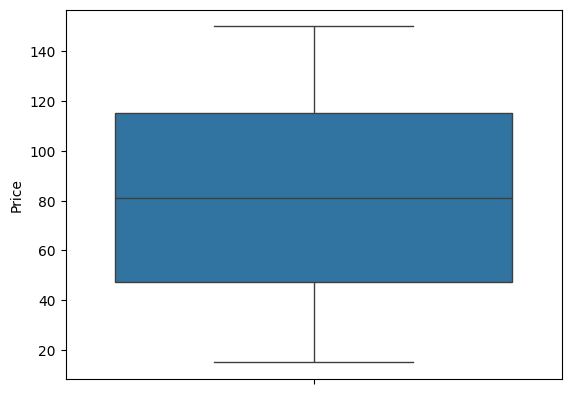

In [25]:
# boxplot vertically Price column
sns.boxplot(df['Price'])
plt.show()

In [26]:
# describe Price column
df['Price'].describe()

,Price
count,300000.000000
mean,81.411107
std,39.039340
min,15.000000
25%,47.384620
50%,80.956120
75%,115.018160
max,150.000000


- columns names can be lower cased and simplified.
- Brand is categorical and NaN values must be addressed.
- Material column has NaN values and must addressed.
- Size column has NaN values.
- Compartments column has no missing values but needs to chage its type.
- Laptop Compartment has missing values, is fairly balanced and must be change to Bool.
- Waterproof column has NaNs, balanced and should be bool.
- Style is also categorical, presents NaNs.
- Color also Categorical, has Nans.
- Weight Capacity (kg) has few NaNs, maybe filled with mean?

# Data proccessing.

- rename columns to follow snake_case style.

In [27]:
# rename column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
# print column names
df.columns

Index(['id', 'brand', 'material', 'size', 'compartments', 'laptop_compartment',
       'waterproof', 'style', 'color', 'weight_capacity_(kg)', 'price'],
      dtype='object')

In [29]:
df = df.rename(columns={'weight_capacity_(kg)': 'weight_cap', 'price': 'Price'})

In [30]:
#print(df.info())

- Fix 'brand' missing values.

In [31]:
df['brand'].fillna('Unknown', inplace=True)

<ipython-input-31-63b27c07249b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown', inplace=True)


In [32]:
#df.info()

- fix material missing values.

In [33]:
# fix 'material' missing values
df['material'].fillna('Unknown', inplace=True)

<ipython-input-33-b7181f26c469>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['material'].fillna('Unknown', inplace=True)


In [34]:
# fix 'size' missing values
df['size'].fillna('Unknown', inplace=True)

<ipython-input-34-b67b2e6444f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna('Unknown', inplace=True)


In [35]:
# change 'compartments' column to int type
df['compartments'] = df['compartments'].astype('int')

In [36]:
# change laptop_compartments to bool values
df['laptop_compartment'] = df['laptop_compartment'].map({'Yes': True, 'No': False})

In [37]:
df['laptop_compartment'].value_counts(dropna=False)

,count
laptop_compartment,
True,148342
False,144214
NaN,7444


- Using the Mode (with Random Tie-breaking) to fill laptop_compartment missing values.

In [38]:
import random

mode = df['laptop_compartment'].mode()[0]  # Get the mode
if random.choice([True, False]):  # Introduce random tie-breaking
    fill_value = mode
else:
    fill_value = not mode  # Choose the opposite of mode with 50% chance

df['laptop_compartment'].fillna(fill_value, inplace=True)

<ipython-input-38-7bad2ae7f677>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['laptop_compartment'].fillna(fill_value, inplace=True)
<ipython-input-38-7bad2ae7f677>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['laptop_compartment'].fillna(fill_value, inplace=True)


In [39]:
df['waterproof'].value_counts(dropna=False)

,count
waterproof,
Yes,148077
No,144873
NaN,7050


- 'waterproof' has a similar problem as laptop_compartment

In [40]:
# change 'waterproof' Yes/No values to bool values
df['waterproof'] = df['waterproof'].map({'Yes': True, 'No': False})

In [41]:
mode = df['waterproof'].mode()[0]
if random.choice([True, False]):
    fill_value = mode
else:
    fill_value = not mode

df['waterproof'].fillna(fill_value, inplace=True)

<ipython-input-41-7ac6c11e082a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waterproof'].fillna(fill_value, inplace=True)
<ipython-input-41-7ac6c11e082a>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['waterproof'].fillna(fill_value, inplace=True)


In [42]:
df['waterproof'].value_counts(dropna=False)

,count
waterproof,
False,151923
True,148077


- Fill missing values in 'Style' column with Unknown

In [43]:
df['style'].fillna('Unknown', inplace=True)

<ipython-input-43-c84f53420cae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['style'].fillna('Unknown', inplace=True)


In [44]:
df['color'].fillna('Unknown', inplace=True)

<ipython-input-44-29beaf37d412>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna('Unknown', inplace=True)


In [45]:
df['weight_cap'].describe()

,weight_cap
count,299862.000000
mean,18.029994
std,6.966914
min,5.000000
25%,12.097867
50%,18.068614
75%,24.002375
max,30.000000


In [46]:
df['weight_cap'].fillna(df['weight_cap'].mean(), inplace=True)

<ipython-input-46-11efc39dd66b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight_cap'].fillna(df['weight_cap'].mean(), inplace=True)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  300000 non-null  int64  
 1   brand               300000 non-null  object 
 2   material            300000 non-null  object 
 3   size                300000 non-null  object 
 4   compartments        300000 non-null  int64  
 5   laptop_compartment  300000 non-null  bool   
 6   waterproof          300000 non-null  bool   
 7   style               300000 non-null  object 
 8   color               300000 non-null  object 
 9   weight_cap          300000 non-null  float64
 10  Price               300000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 21.2+ MB


In [ ]:
# save this corrected dataframe in my drive
#from google.colab import drive
#drive.mount('/content/drive')
#df.to_csv('/content/drive/My Drive/categorical_backpack.csv', index=False)

Mounted at /content/drive


# Variables Encoding.

- This step will be done in a separate file to explore the various techniques available to handle categorical variables.

- One Hot Encoding for categorical variables : brand, material, style and color

In [49]:
'''
# Select the categorical columns to be encoded
categorical_cols = ['brand', 'material', 'style', 'color']

# Apply one-hot encoding using get_dummies
encoded_data = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

# Drop the original categorical columns
df.drop(categorical_cols, axis=1, inplace=True)
'''

"\n# Select the categorical columns to be encoded\ncategorical_cols = ['brand', 'material', 'style', 'color']\n\n# Apply one-hot encoding using get_dummies\nencoded_data = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)\n\n# Concatenate the encoded data with the original DataFrame\ndf = pd.concat([df, encoded_data], axis=1)\n\n# Drop the original categorical columns\ndf.drop(categorical_cols, axis=1, inplace=True)\n"

- Ordinal encoding for size variable.

In [51]:
'''
# Create a dictionary to map size categories to numerical values
size_mapping = {
    'Small': 0,
    'Medium': 1,
    'Large': 2,
    'Unknown': 3  # Or you can assign it -1 or another distinct value
}

# Apply the mapping to the 'size' column
df['size_encoded'] = df['size'].map(size_mapping)

# Drop the original 'size' column (optional)
df.drop('size', axis=1, inplace=True)
'''

"\n# Create a dictionary to map size categories to numerical values\nsize_mapping = {\n    'Small': 0,\n    'Medium': 1,\n    'Large': 2,\n    'Unknown': 3  # Or you can assign it -1 or another distinct value\n}\n\n# Apply the mapping to the 'size' column\ndf['size_encoded'] = df['size'].map(size_mapping)\n\n# Drop the original 'size' column (optional)\ndf.drop('size', axis=1, inplace=True)\n"

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  300000 non-null  int64  
 1   brand               300000 non-null  object 
 2   material            300000 non-null  object 
 3   size                300000 non-null  object 
 4   compartments        300000 non-null  int64  
 5   laptop_compartment  300000 non-null  bool   
 6   waterproof          300000 non-null  bool   
 7   style               300000 non-null  object 
 8   color               300000 non-null  object 
 9   weight_cap          300000 non-null  float64
 10  Price               300000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 21.2+ MB
